<a href="https://colab.research.google.com/github/ritzi12/notebooks_supervised/blob/main/binary_classifiers_classification_metrics_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This notebook is a tutorial on various classifiers that can be used for binary classifications and also we will go through various classification metrics used to evaluate such a classifier.

In [ ]:
#import important libraries
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np


In [ ]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape #42,000 rows of data with each row having (28*28=784 features or col with pixel values)

(42000, 785)

In [ ]:
X=train.iloc[:,1:]
Y=train.label

In [ ]:
X.shape

(42000, 784)

In [ ]:
test=pd.read_csv('../input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sum(Y==2)

4177

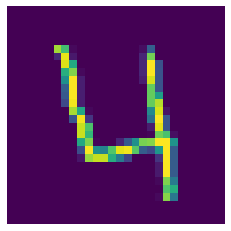

In [ ]:
#PLOT images
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.loc[3,:].values
some_digit_image = some_digit.reshape(28, 28)#reshaping into 2-D image matrix

plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

# Binary Classification Methods

In [ ]:
#Label Encoding : If digit is  2 value true else false

#target value is in integer converting to boolean
y_is_digit2= (Y==2)
y_is_digit2

0        False
1        False
2        False
3        False
4        False
         ...  
41995    False
41996    False
41997    False
41998    False
41999    False
Name: label, Length: 42000, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_is_digit2,random_state=1)

In [ ]:
y_train

25138    False
40867    False
17205    False
3450     False
1491     False
         ...  
7813     False
32511    False
5192      True
12172    False
33003    False
Name: label, Length: 31500, dtype: bool

# 1) K-NEIGHBORS CLASSIFIER
**KNeighborsClassifier Parameters**<br>
`n_neighbors` = specify value of k <br>
`weights`     = (default='uniform')<br>
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.<br>
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.<br>
[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

`algorithm`= (default='auto','kd_tree','ball_tree','brute')
KDtree,Ball Tree - good effiecient for large datasets ,

brute- useful for small datasets and more accurate as considers all datapoints

`metric` = specifies distance metric default='minowski'




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from random import seed

seed(123) # setting  random seed for reproducibility

#create instance of Knn classifier
knn_clf=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')

#knn_clf.fit(X_train,y_train)# this training takes less time since KNN is lazy learning algorithm


KNeighborsClassifier()

In [ ]:
#knn_clf.score(X_test,y_test)

In [ ]:
#y_pred_knn=knn_clf.predict(X_test)

## 2) Stochastic Gradient Descent Classifier

This classifier has the advantage of being **capable of handling very large datasets efficiently**. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_pred_sgd = sgd_clf.predict(X_test)
sgd_clf.score(X_test,y_test)

0.9619047619047619

## 3) Gaussian Naive Bayes Classifier

Naive Bayes is the most common classifier for binary classification. It is fast and easy to calculate.Naive — Bayes is a classifier which uses Bayes Theorem. It calculates the probability for membership of a data-point to each class and assigns the label of the class with the highest probability.

For our MNIST dataset we have continuous features so we can apply Gaussian Naive Bayes which assumes distribution of feature values as Gaussian Distribution .

In [ ]:
from sklearn.naive_bayes  import GaussianNB

gauss_clf= GaussianNB()
gauss_clf.fit(X_train,y_train)

gauss_clf.score(X_test,y_test)


0.38152380952380954

The mean of each pixel for True class (784,)


(-0.5, 27.5, 27.5, -0.5)

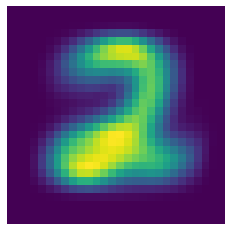

In [ ]:
print('The mean of each pixel for True class',gauss_clf.theta_[1].shape)

plt.imshow(gauss_clf.theta_[1].reshape(28,28))
plt.axis('off')

In [ ]:
y_pred_gauss=gauss_clf.predict(X_test)

## 4) Logistic Regression Classifier

 It it the most common regression classifier .  Like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic or **sigmoid** function output which gives the probability of belonging to a class or not and output range of sigmoid function (0,1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)   #fit calculates the mean and std dev for each feature in data
X_train_scaled=scaler.transform(X_train) #transforming the X_train feature inputs
logis_clf=LogisticRegression(solver='sag')
logis_clf.fit(X_train_scaled,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='sag')

In [ ]:
X_test_scaled=scaler.transform(X_test) #scaling the test set note we dont use fit on test set which is wrong since it leads to data leakage
logis_clf.score(X_test_scaled,y_test)

0.979047619047619

In [ ]:
y_pred_logis=logis_clf.predict(X_test)

## 5) Support Vector Machines

SVM is a powerful classifier/regression algorithms . They are non-parametric and can construct complex decision boundaries.

In [ ]:
from sklearn.svm import SVC

svc_clf=SVC(random_state=123,class_weight='balanced') #using default kernel 'rbf'
svc_clf.fit(X_train,y_train)


SVC(class_weight='balanced', random_state=123)

In [ ]:
svc_clf.score(X_test,y_test)

0.9948571428571429

In [ ]:
y_pred_svc=svc_clf.predict(X_test)

# Classification Evaluation Metrics

## Confusion Matrix


A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets.

We need to have predicted classes from each of our classifiers which we calculated earlier (y_pred_knn ,y_pred_sgd...etc.)

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt

#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred_logis)

#Display Confusion Matrix
ConfusionMatrixDisplay(conf_mat,display_labels=['Not Digit 2','Is Digit 2'])
plt.title('Confusion Matrix for KNNeighbors whether a data is digit 2 or not ')
plt.show()

array([[8084, 1359],
       [  40, 1017]])

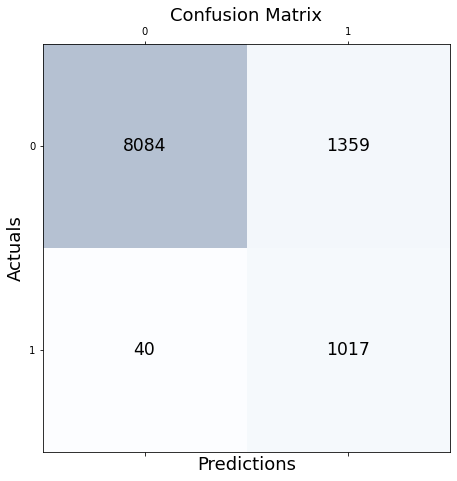

In [ ]:
ig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Normalized Confusion Matrix
We can get normalized confusion matrix by using `normalize` argument of ConfusionMatrixDisplay

Using `normalize` =(default ='None')<br>
'all'=values divided by total datapoints,<br>
'true'= each value divided by corresponding total true values for each class , in this diagonal represent recall<br>
'pred'=each value divided by total predicted value for each class,diagonals represent precision<br>


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test ,y_pred=y_pred_logis,cmap='plasma',normalize='true',display_labels=['Not Digit 2','Is Digit 2'])
plt.title('NOrmalized Confusion Matrix for KNNeighbors based on true values ')
plt.show()
print('Diagonals Represent Recall of each class')

## Classification Report


### 1.Precision
TP/TP+FP = calculated wrt to predicted values.
It measures “exactness” of our model . How exact or precise it is in predicting  true positive classes out of all classes that were predicted as positive .
 When cost of false positive is high High precision is required. Ex- spam email.


### 2.Recall/Sensitivity

TP/TP+FN = calculated wrt to true values.
It “Measures ” completeness of model . How well our model in capture all positive cases out of all the data points.
When cost of False Negative is high high recal is required .Ex- target customers to accept discount offer.


### 3.Specificity

TN/TN+FP  ==calculated wrt to true values.


### 4.Accuracy

Diagonal elements/Total datapoints = TP+TN/Total Datapoints

*Not an accurate metric in case of imbalanced/skewed dataset.*


### 5.F-1 Score
Harmonic Mean of precision and Recall.F1 score is the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

F1 score favors classifiers that have similar precision and recall.

In some contexts you mostly care about precision, and in other contexts you really care about recall.


In [ ]:
#CLassification Metric Report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_logis))

              precision    recall  f1-score   support

       False       1.00      0.86      0.92      9443
        True       0.43      0.96      0.59      1057

    accuracy                           0.87     10500
   macro avg       0.71      0.91      0.76     10500
weighted avg       0.94      0.87      0.89     10500



In [ ]:
# Calculating F-1 Score for all classifiers since we have imbalanced
#dataset so F1 score metric more suitable for this case than accuracy
from sklearn.metrics import f1_score


score_df=[y_pred_gauss,y_pred_sgd,y_pred_svc,y_pred_logis]
f1_scores=[]
name=['Gauss','SGD','SVC','Logis']

for score in score_df:
  print("The f1 score")
  f1_scores.append(round(f1_score(y_test,score),3))
  print(f1_scores)




The f1 score
[0.242]
The f1 score
[0.242, 0.83]
The f1 score
[0.242, 0.83, 0.975]
The f1 score
[0.242, 0.83, 0.975, 0.592]


Text(0.5, 1.0, 'F1- Scores of various classifiers')

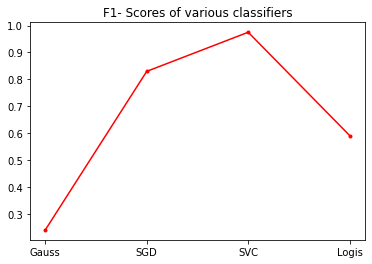

In [ ]:
plt.plot(name,f1_scores,'r.-')
plt.title('F1- Scores of various classifiers')

We can see we get best scores for KNN and SVC and worst score for Gaussian Naive Bayes.

The reason could be that we are analysing pixel points of image and knn and SVC are distance based classifiers which is apt for this case .

### 6.Macro Average
It is average of precision of each class.
Macro Average =(Precision Class A + Precision Class B)/2

### 7.Weighted Average
It is weighted average of precision of each class.
Na*PrecisionA +Nb*PrecisionB/ Total elements

## Precision - Recall Curve

Increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off. We can plot PR Curve to decide on the decision threshold based on our requirement of precision /recall.

## Cross Validation Score

We can use cross validation to test our model across several folds of data to get better metric for evaluation which is not biased. This comes at a cost of more training time .

In [ ]:
#Cross val score,cross val predict
from sklearn.model_selection import cross_val_score,cross_val_predict

print(cross_val_score(logis_clf,X_train,y_train))

#y_cross_pred= cross_val_predict(knn_clf,X_test,y_test,method='decision_function')

## Submission CSV

Finally out of all the above classifier we got maximum accuracy for SVC so using it to generate prediction for test.csv for our submission

In [ ]:
y_test_predictions=svc_clf.predict(test)

In [ ]:
y_test_predictions

array([ True, False, False, ..., False, False,  True])

In [ ]:
ImageId=[i for i in range(1,28001)]
submission=pd.DataFrame({"ImageId":ImageId,"Label":y_test_predictions},columns=['ImageId','Label'])

submission.head()

,ImageId,Label
0,1,True
1,2,False
2,3,False
3,4,False
4,5,False


In [ ]:
submission.to_csv("./submission.csv",index=False)